# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Why is this problem important to solve?
- Predicting loan defaults is crucial for banks as it directly impacts their profitability and financial stability. Defaults, also known as non-performing assets (NPAs), can erode a bank's profits and damage its reputation. Furthermore, the traditional loan approval process is effort-intensive, time-consuming, and prone to human error and biases. Developing a robust, data-driven model for loan default prediction can help banks streamline the approval process, minimize biases, and reduce the number of bad loans, ultimately leading to better risk management and higher profits.

### **The objective:**

What is the intended goal?
- The primary goal of this project is to build a classification model that can accurately predict whether a client is likely to default on their loan. By leveraging machine learning techniques and an interpretable model, the bank can identify critical features to consider during the loan approval process and make better-informed lending decisions. Ultimately, this will help the bank reduce the number of loan defaults and increase overall profitability.

### **The key questions:**

What are the key questions that need to be answered?
- Which features are most important in determining the likelihood of a loan default?
- How can the bank minimize biases in the loan approval process?
- How can the model's predictions be interpreted and justified, especially in cases of loan rejections?
- What recommendations can be provided to the bank based on the findings to improve the loan approval process?

### **The problem formulation**:

What is it that we are trying to solve using data science?
- The problem we are trying to solve using data science is to develop a predictive model that accurately identifies clients who are likely to default on their loan, while ensuring interpretability and minimizing biases. By analyzing the provided dataset, we aim to identify patterns and relationships between the input features and the target variable (loan default). This will enable the bank to make better-informed lending decisions and improve the overall efficiency of the loan approval process.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [87]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [22]:
# read data and create copy
# first 5 rows

data = pd.read_csv("hmeq.csv")
df = data.copy()
df.head()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [23]:
# last 5 rows of data

df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [24]:
# shape (rows, columns) of data

df.shape

(5960, 13)

In [25]:
# info (type of data in each column) of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [52]:
# Null values in data

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
     column name  Total missing  Percent missing
0       DEBTINC           1267         0.212584
1         DEROG            708         0.118792
2        DELINQ            580         0.097315
3       MORTDUE            518         0.086913
4           YOJ            515         0.086409
5          NINQ            510         0.085570
6         CLAGE            308         0.051678
7           JOB            279         0.046812
8        REASON            252         0.042282
9          CLNO            222         0.037248
10        VALUE            112         0.018792
11          BAD              0         0.000000
12         LOAN              0         0.000000


Insights:
- BAD and LOAN are only two columns without missing values
- DEBTINC and DEROG both have over 10% of their values missing with DEBTINC having a drastic 21% of values missing

In [31]:
# check for duplicated values

df.duplicated().sum()

0

**Datasets** (Plan)

- data: original data
- df: copy of original data
- df_rem: remove all null values from df
- df_imp: impute missing values in df
- df_eng: df_rem with added features
- df_feat: df_imp with added features

**df_rem**

In [67]:
# create df_rem 

df_rem = df.dropna()
df_rem.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [58]:
df_rem.shape

(3364, 13)

In [60]:
df_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   int64  
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   float64
 8   DELINQ   3364 non-null   float64
 9   CLAGE    3364 non-null   float64
 10  NINQ     3364 non-null   float64
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


In [62]:
df_rem.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3364.0,0.089180,0.285045,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3364.0,19154.399524,10875.418447,1700.000000,12000.000000,17000.000000,23825.000000,89900.000000
MORTDUE,3364.0,76249.621581,45095.372690,5076.000000,49351.250000,67278.500000,92986.750000,399412.000000
VALUE,3364.0,107501.385850,54728.240086,21144.000000,71235.000000,94453.500000,122339.250000,512650.000000
YOJ,3364.0,9.110285,7.596541,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,3364.0,0.146849,0.579524,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3364.0,0.278835,0.809631,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3364.0,180.993684,82.769271,0.486711,118.687903,176.742048,230.402191,1168.233561
NINQ,3364.0,1.037455,1.549777,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,3364.0,22.114150,9.387330,0.000000,16.000000,21.000000,27.000000,64.000000


**df_imp**

## Summary Statistics

In [66]:
# basic summary statistics for numerical datatype columns

df_rem.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3364.0,0.089180,0.285045,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3364.0,19154.399524,10875.418447,1700.000000,12000.000000,17000.000000,23825.000000,89900.000000
MORTDUE,3364.0,76249.621581,45095.372690,5076.000000,49351.250000,67278.500000,92986.750000,399412.000000
VALUE,3364.0,107501.385850,54728.240086,21144.000000,71235.000000,94453.500000,122339.250000,512650.000000
YOJ,3364.0,9.110285,7.596541,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,3364.0,0.146849,0.579524,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3364.0,0.278835,0.809631,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3364.0,180.993684,82.769271,0.486711,118.687903,176.742048,230.402191,1168.233561
NINQ,3364.0,1.037455,1.549777,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,3364.0,22.114150,9.387330,0.000000,16.000000,21.000000,27.000000,64.000000


## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [93]:
# Making a list of categorical and numerical columns

cat_col = list(df.select_dtypes("object").columns)
int_col = list(df.select_dtypes("int64").columns)
float_col = list(df.select_dtypes("float64").columns)
num_col = int_col + float_col

print("categorical columns: ", cat_col)
print("numerical columns: ", num_col)

categorical columns:  ['REASON', 'JOB']
numerical columns:  ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [94]:
# count of unique values in each column

df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [95]:
# Iterate through each categorical column and display unique values, counts, and ratio
for col in cat_col:
    print(f"Unique values for '{col}':")
    
    # Calculate value counts and ratio
    value_counts = df[col].value_counts(dropna=False)
    value_ratios = value_counts / len(df)
    
    # Combine counts and ratios into a single DataFrame
    summary = pd.concat([value_counts, value_ratios], axis=1, keys=['Count', 'Ratio'])
    
    print(summary)
    print("\n")

Unique values for 'REASON':
         Count     Ratio
DebtCon   3928  0.659060
HomeImp   1780  0.298658
NaN        252  0.042282


Unique values for 'JOB':
         Count     Ratio
Other     2388  0.400671
ProfExe   1276  0.214094
Office     948  0.159060
Mgr        767  0.128691
NaN        279  0.046812
Self       193  0.032383
Sales      109  0.018289




In [96]:
# Printing count of each unique value in each categorical column

for column in cat_col:
    print(df[column].value_counts(normalize = True))
    print("-" * 30)

DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
------------------------------
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
------------------------------


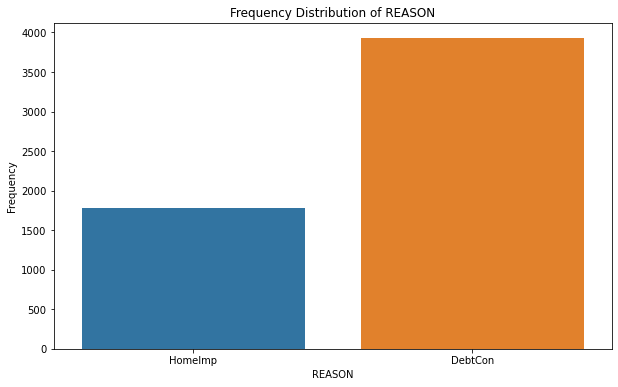

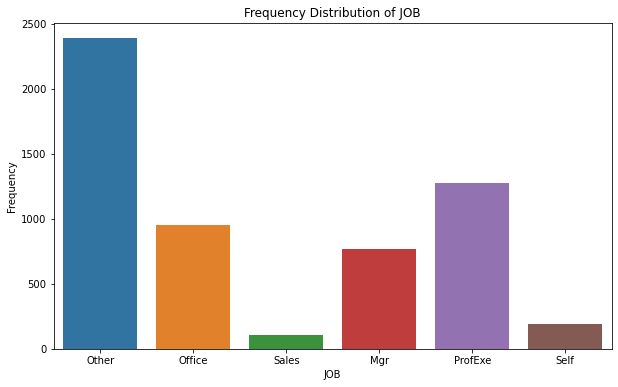

In [97]:
# Univariate analysis for categorical features
cat_columns = ['REASON', 'JOB']

for col in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

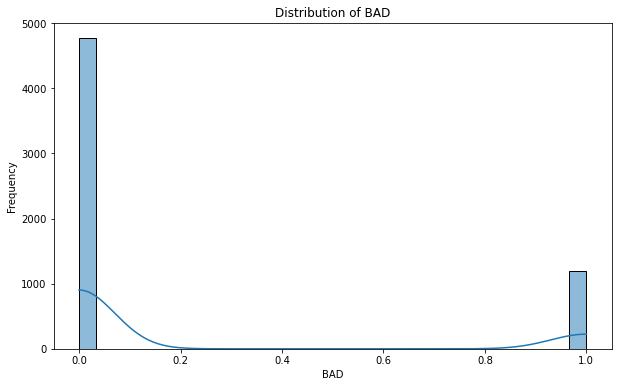

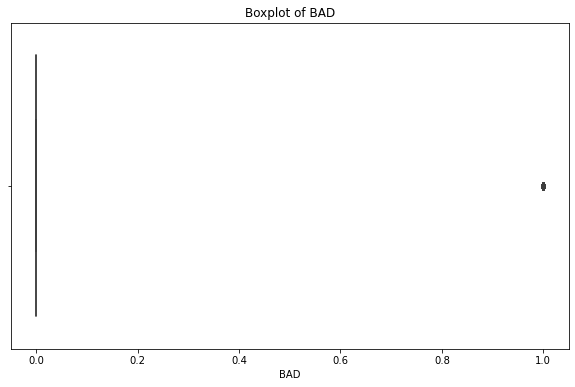

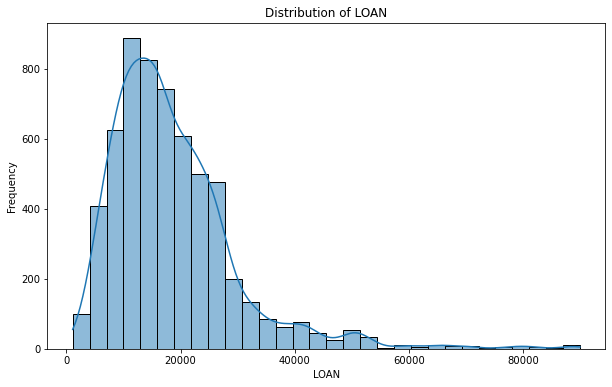

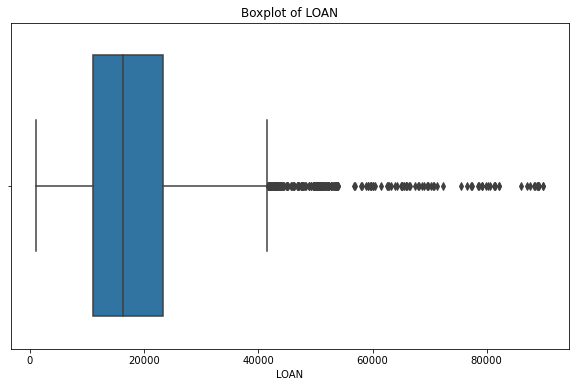

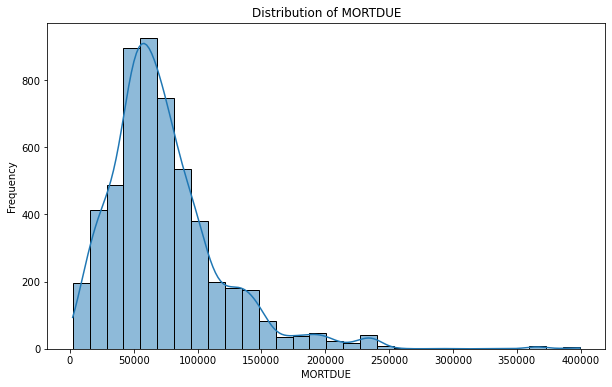

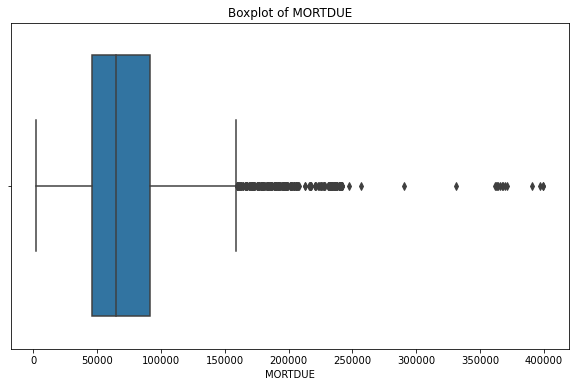

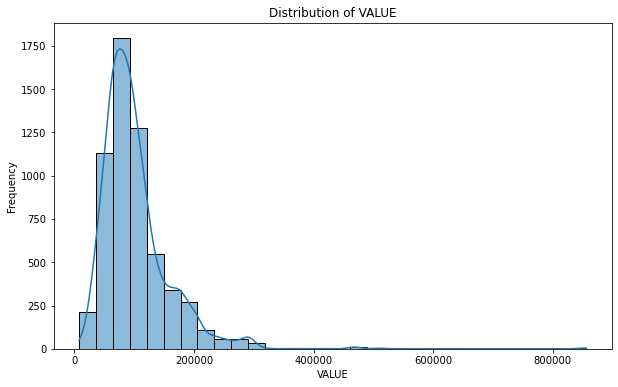

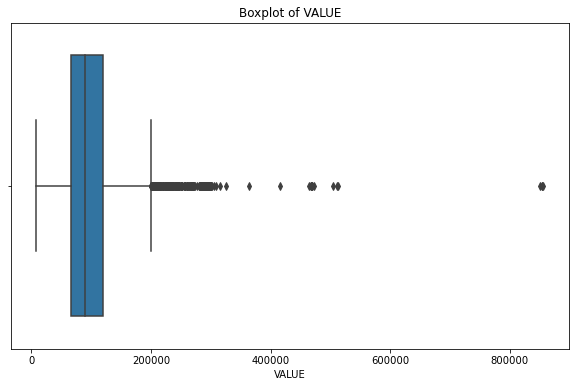

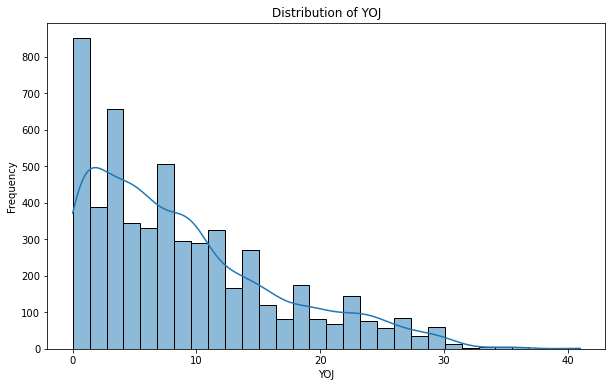

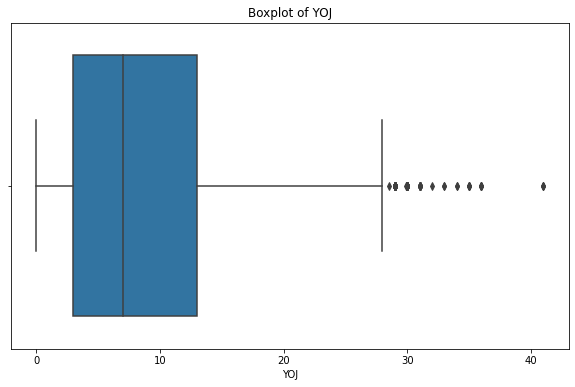

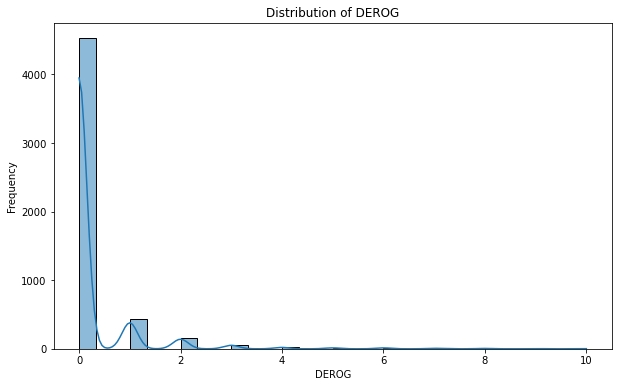

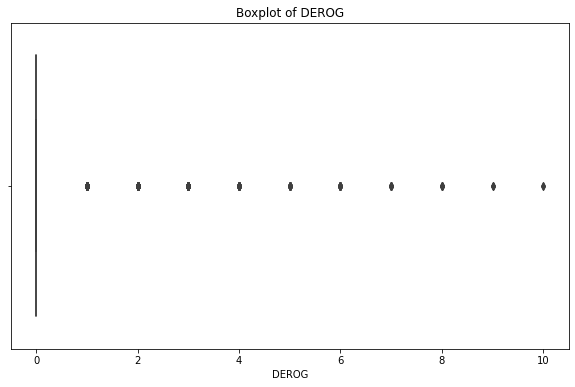

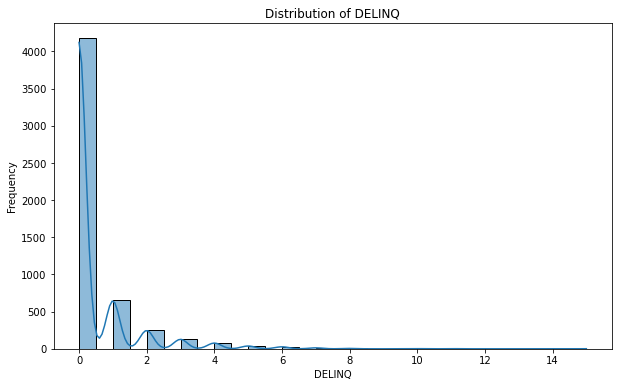

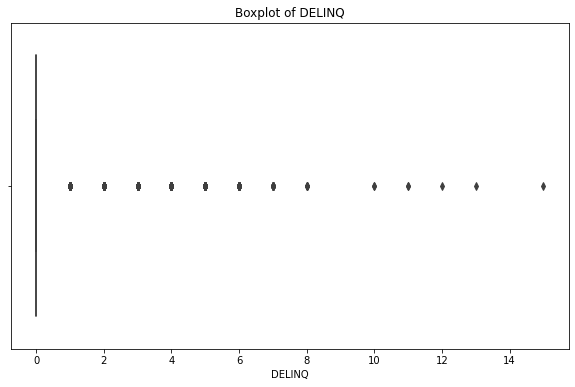

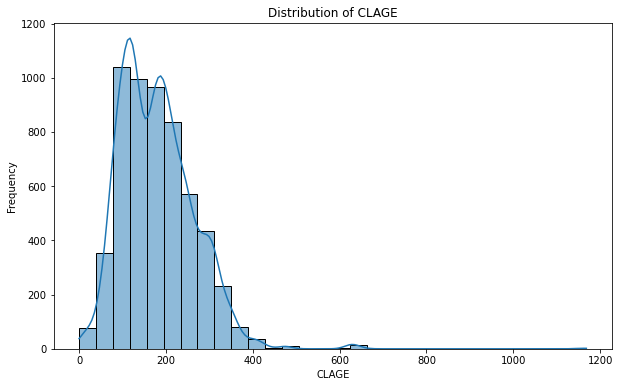

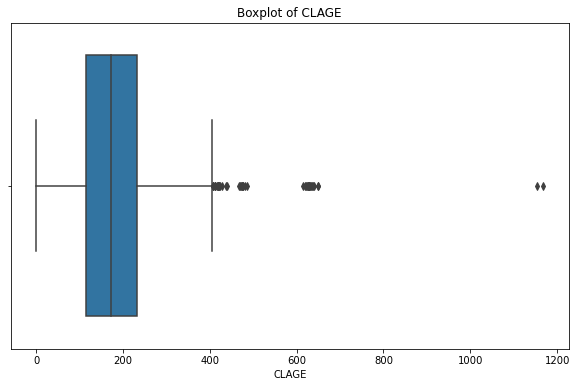

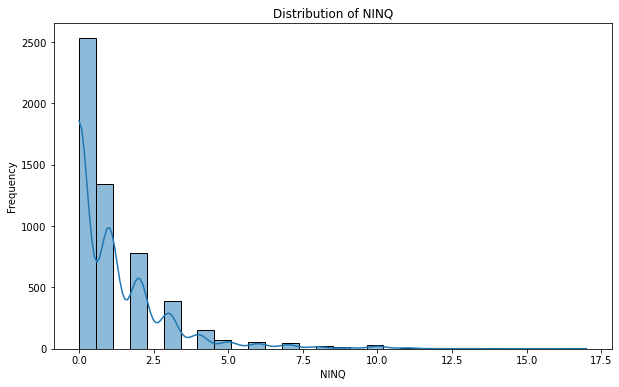

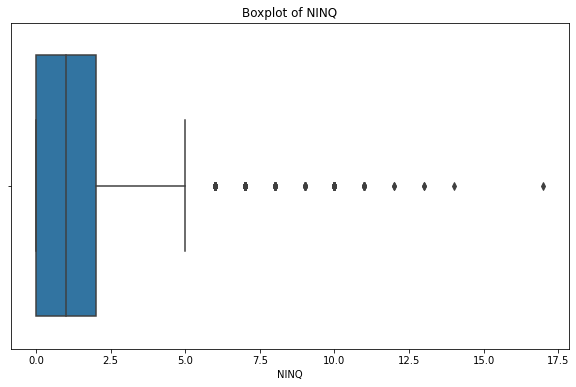

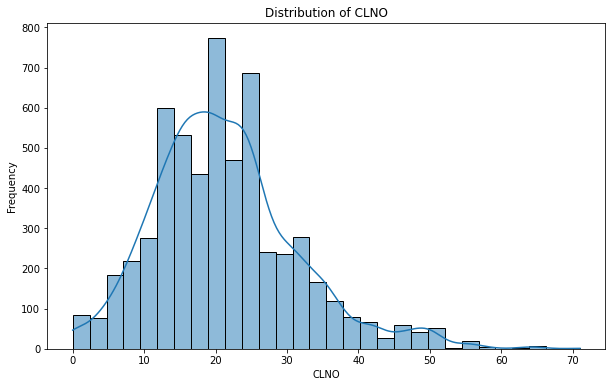

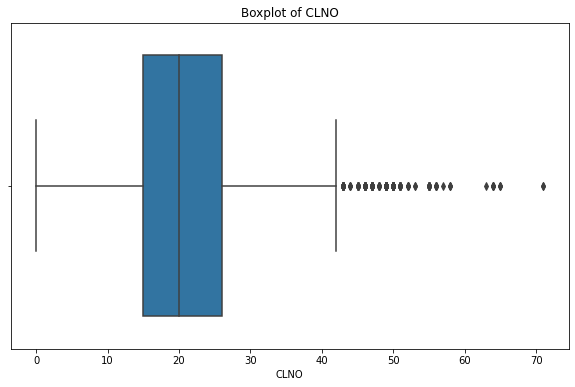

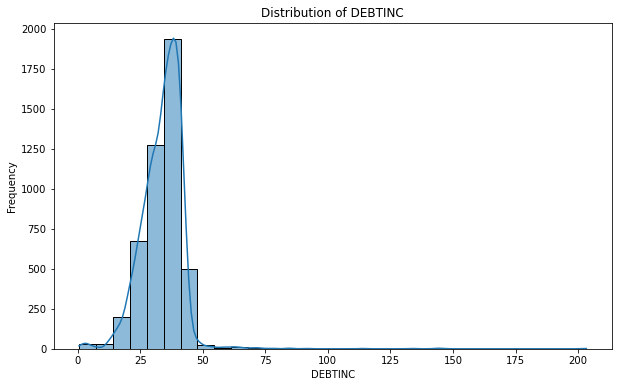

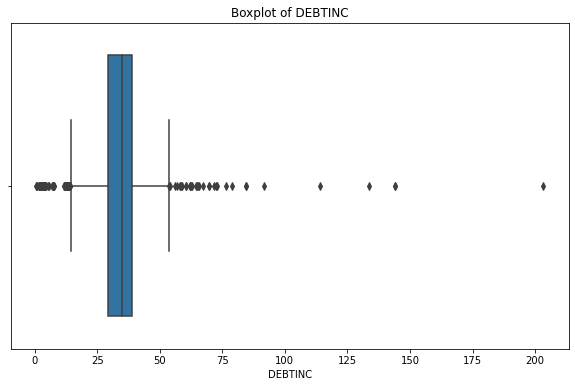

In [98]:
# Univariate analysis for numerical features

for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot for detecting outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### **Bivariate Analysis**

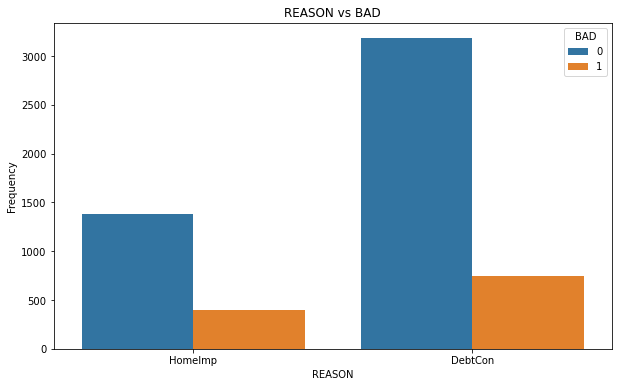

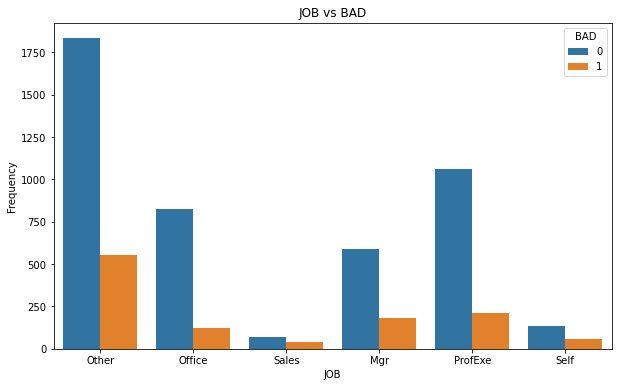

In [105]:
# Bivariate analysis: Categorical features vs. target (BAD)
cat_columns = ['REASON', 'JOB']

for col in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='BAD', data=df)
    plt.title(f'{col} vs BAD')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

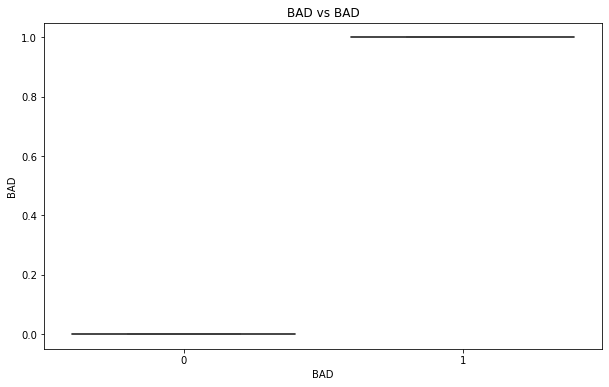

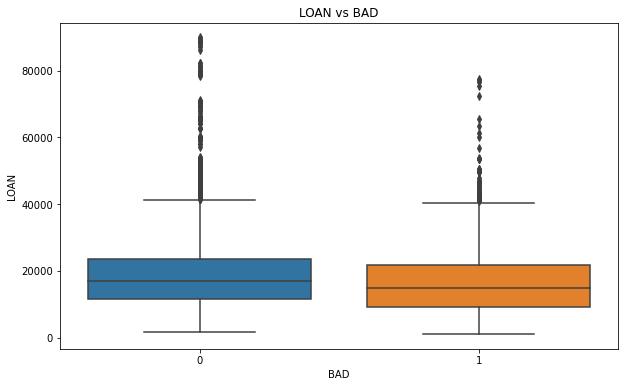

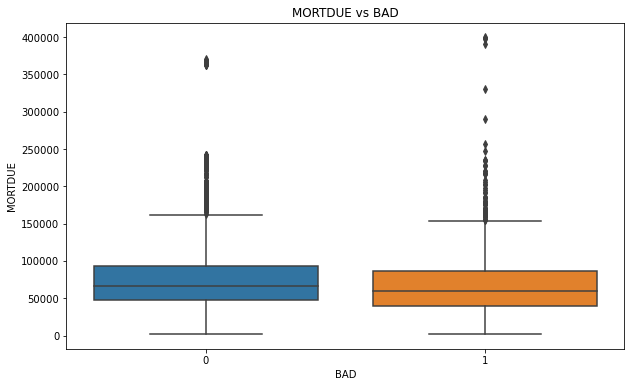

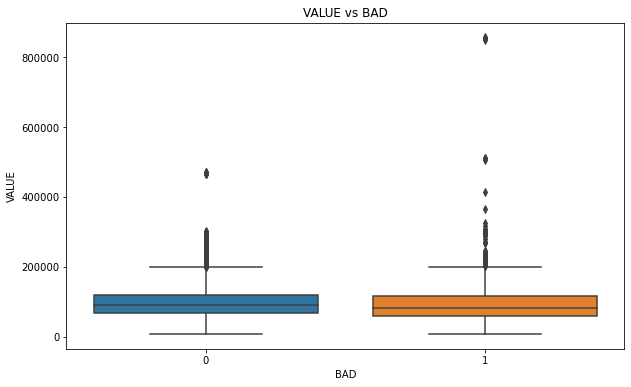

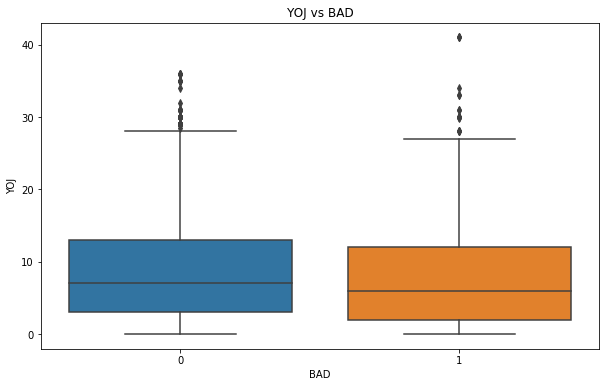

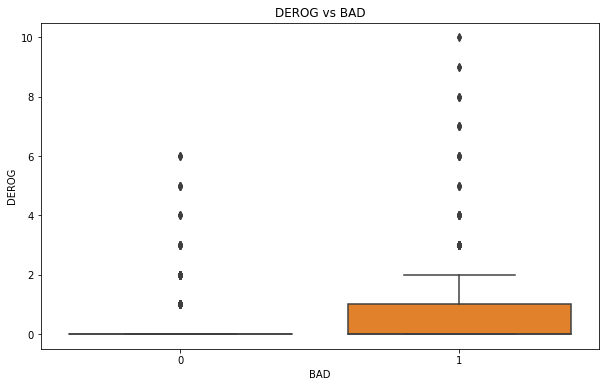

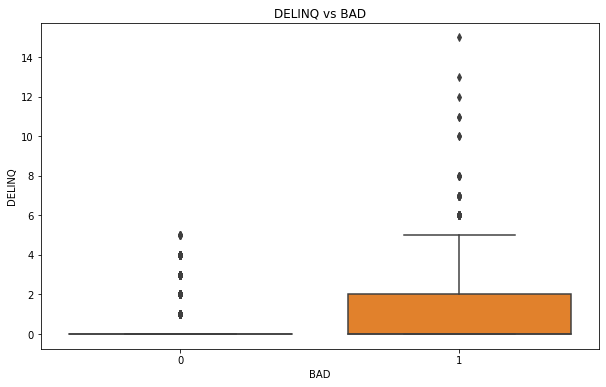

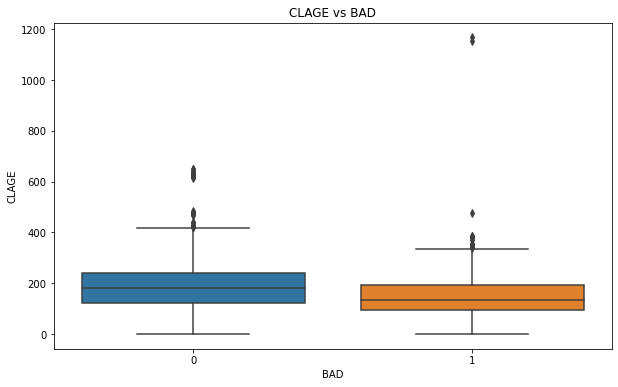

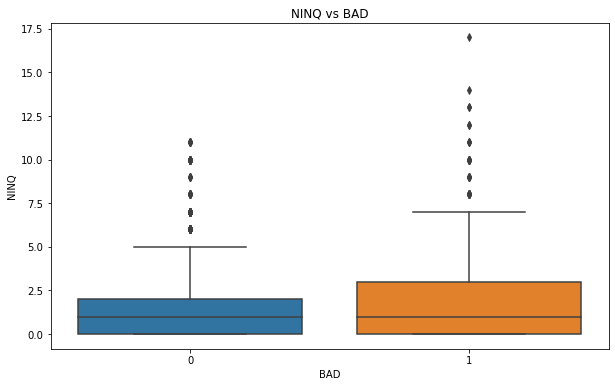

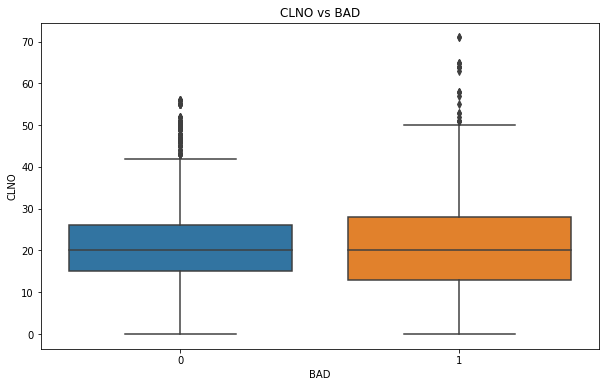

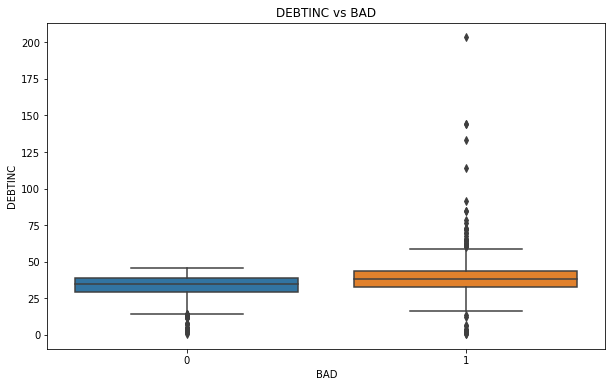

In [99]:
# Bivariate analysis: Numerical features vs. target (BAD)

for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='BAD', y=col, data=df)
    plt.title(f'{col} vs BAD')
    plt.xlabel('BAD')
    plt.ylabel(col)
    plt.show()

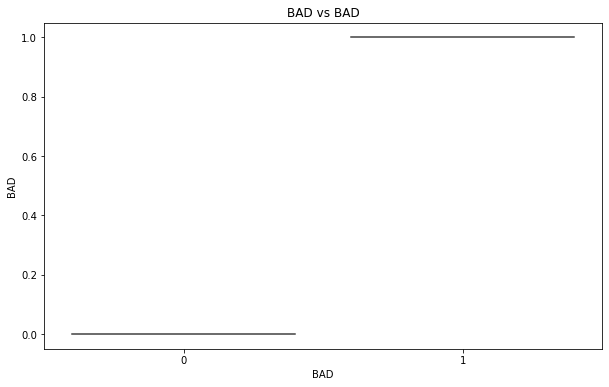

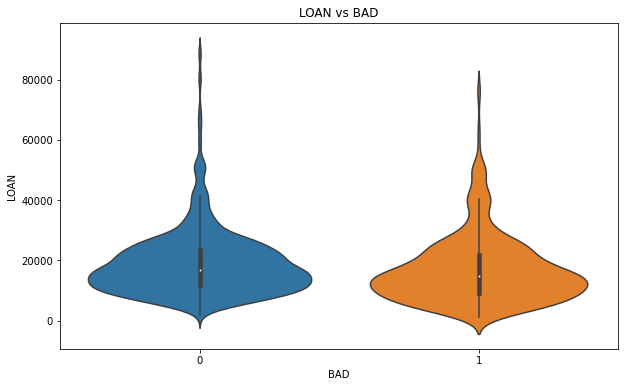

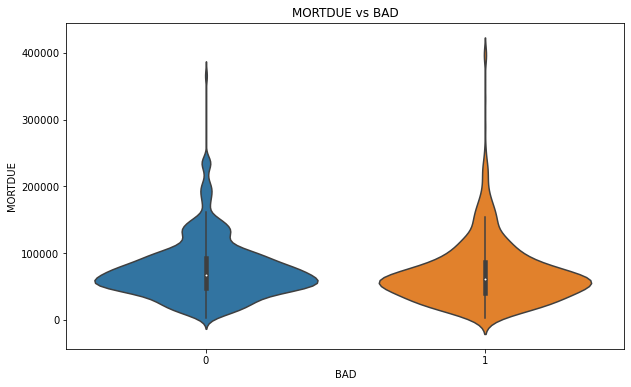

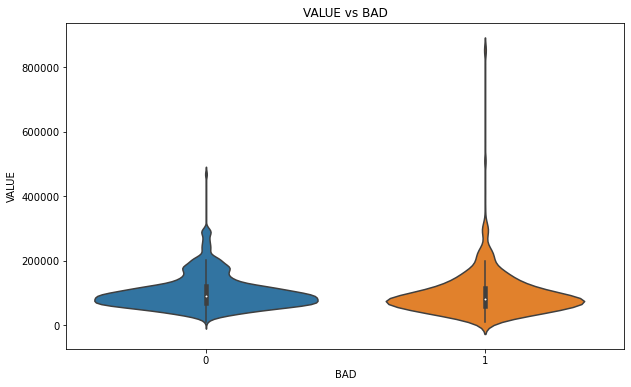

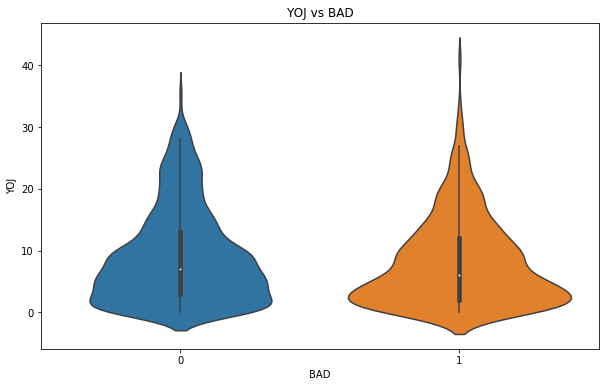

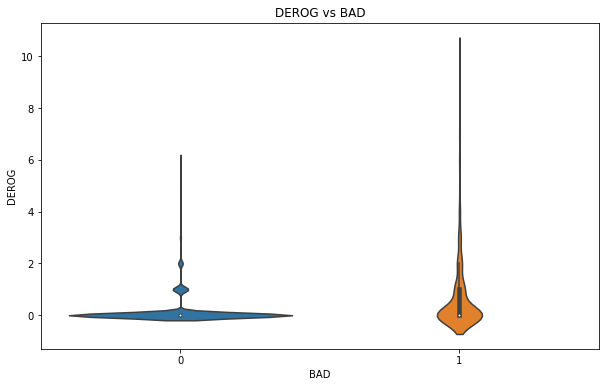

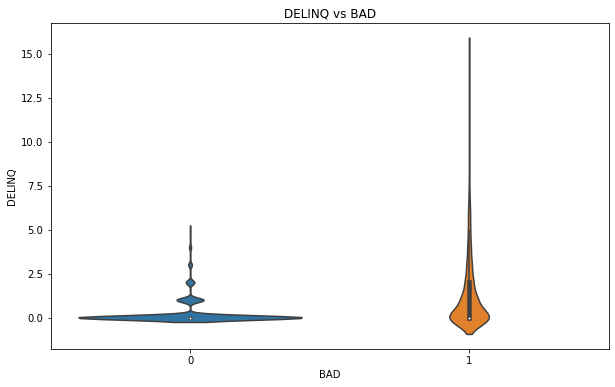

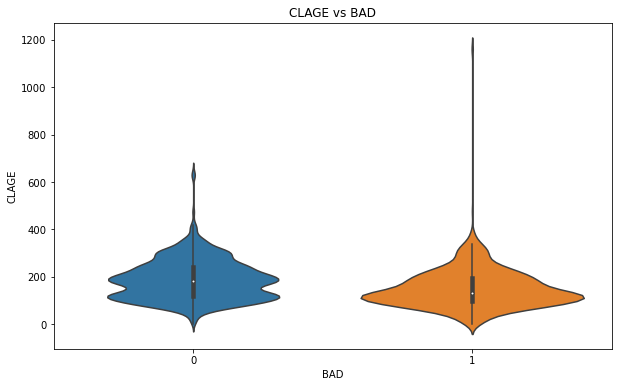

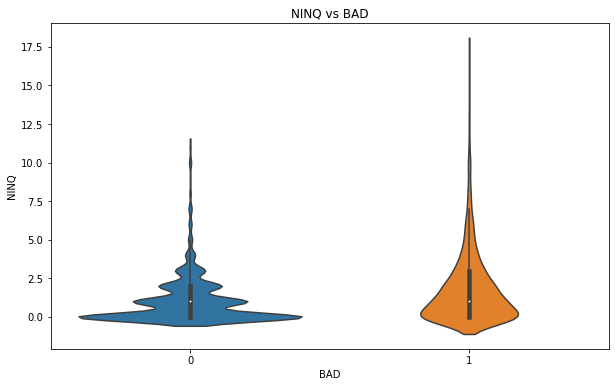

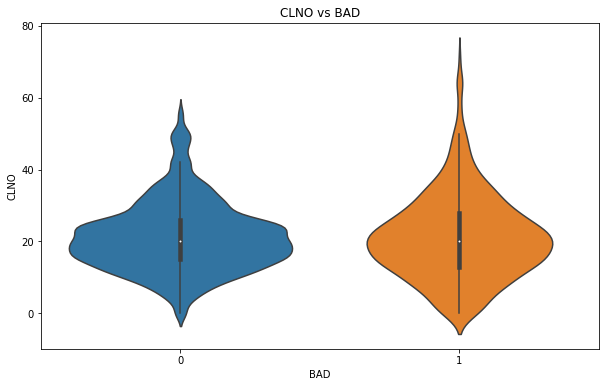

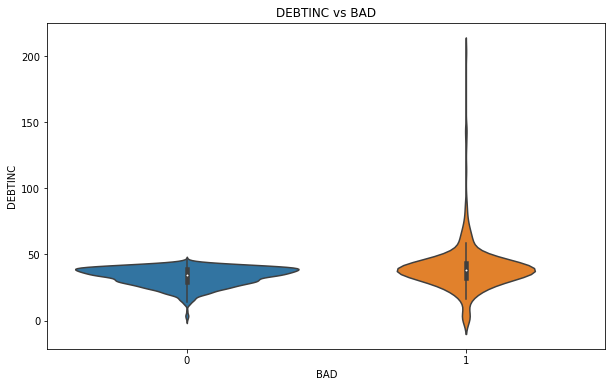

In [102]:
# Violin plots for numerical features vs. target (BAD)
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='BAD', y=col, data=df)
    plt.title(f'{col} vs BAD')
    plt.xlabel('BAD')
    plt.ylabel(col)
    plt.show()

### **Multivariate Analysis**

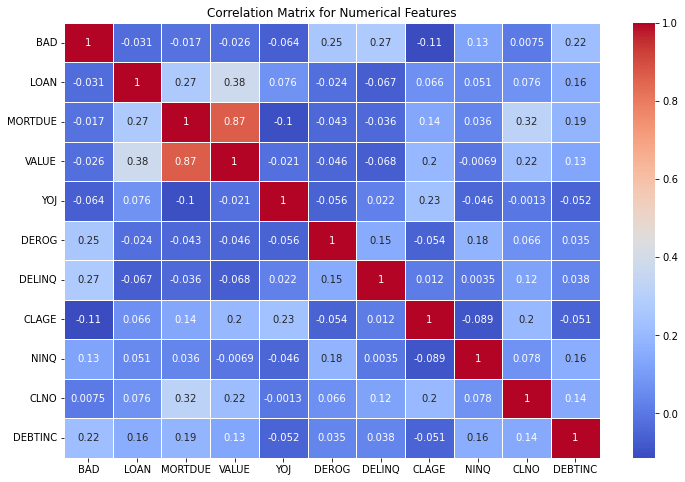

In [103]:
# Calculate the correlation matrix
correlation_matrix = df_rem[num_col].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

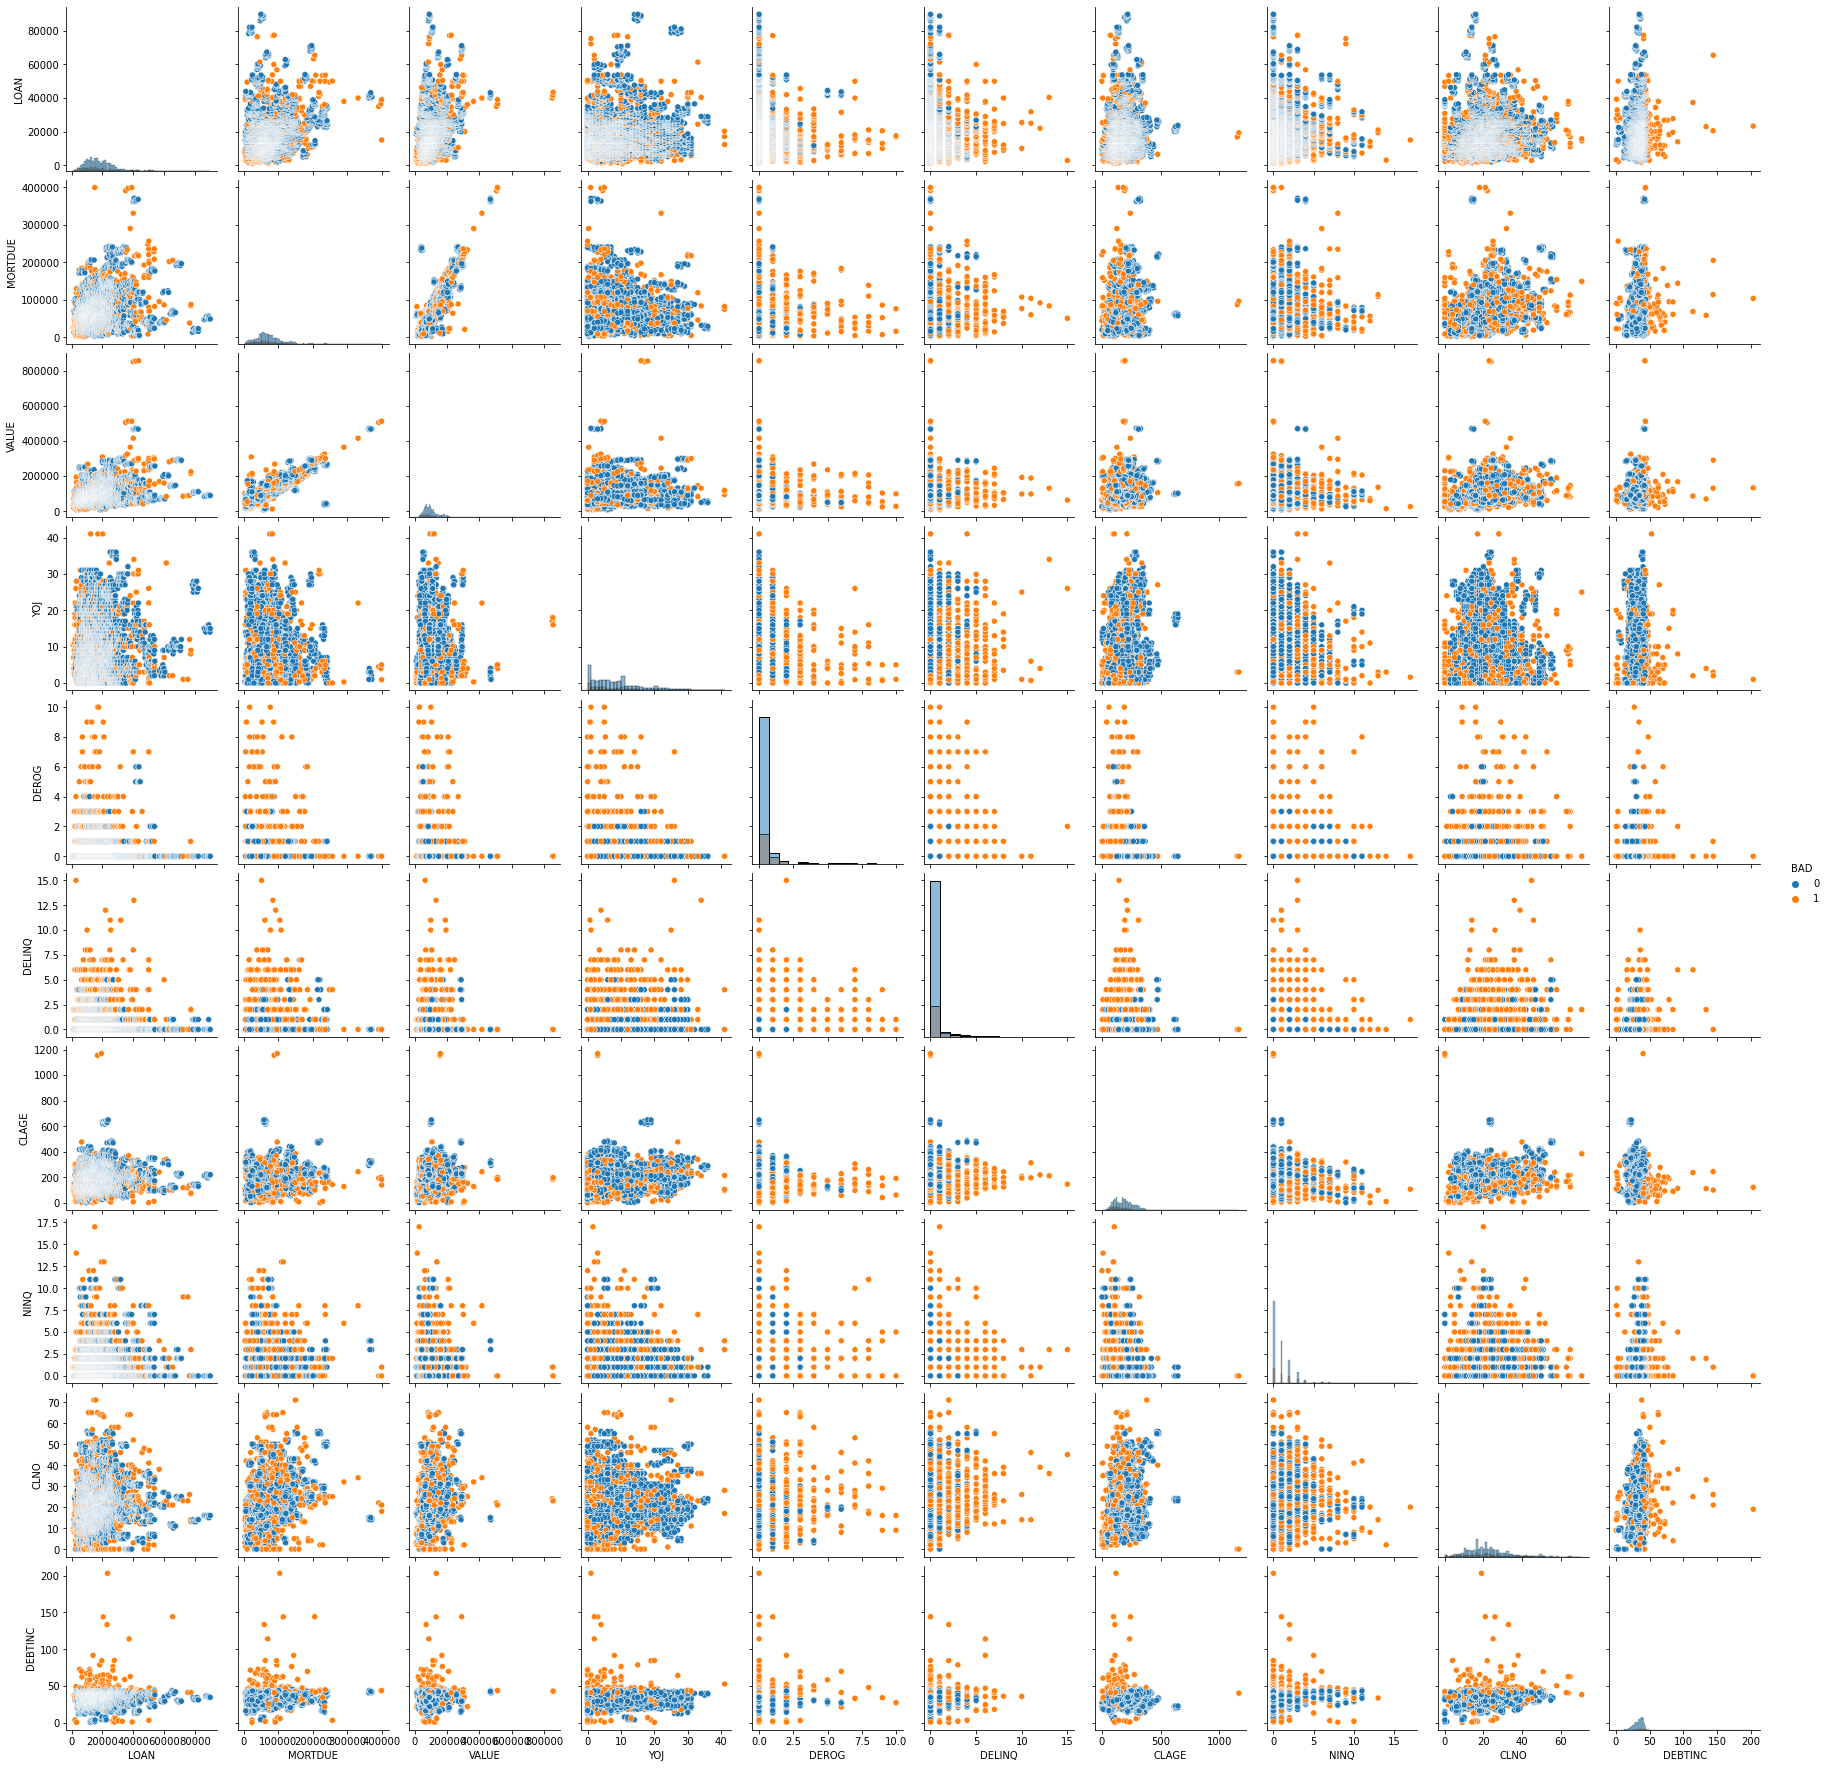

In [107]:
# Multivariate analysis: Pairwise scatter plots
# Create scatter plots for pairs of numerical features
num_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

sns.pairplot(df[num_columns + ['BAD']], hue='BAD', diag_kind='hist')
plt.show()


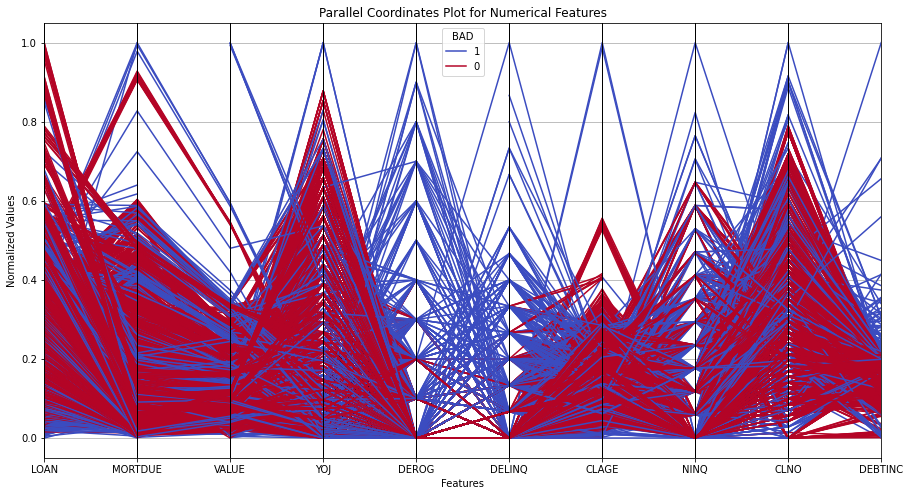

In [108]:
# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates

# Normalize numerical columns
df_normalized = df.copy()
for col in num_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = (df[col] - min_val) / (max_val - min_val)

# Prepare the DataFrame for the parallel_coordinates plot
df_parallel = df_normalized[['BAD'] + num_columns]
df_parallel['BAD'] = df_parallel['BAD'].astype('category')

# Create the parallel_coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(df_parallel, 'BAD', colormap='coolwarm')
plt.title('Parallel Coordinates Plot for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.legend(title='BAD')
plt.show()

## Treating Outliers

In [109]:
# Initialize an empty DataFrame to store the outlier information
outliers_info = pd.DataFrame(columns=['Column', 'Lower_Bound', 'Upper_Bound', 'Outliers_Count'])

# Iterate through each numerical column and identify outliers
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_rem[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)

    # Append the outlier information to the DataFrame
    outliers_info = outliers_info.append({'Column': col, 'Lower_Bound': lower_bound, 'Upper_Bound': upper_bound, 'Outliers_Count': outliers_count}, ignore_index=True)

# Display the outlier information
print(outliers_info)

     Column Lower_Bound Upper_Bound Outliers_Count
0       BAD         0.0         0.0            300
1      LOAN     -7200.0     41600.0            126
2   MORTDUE    -21542.0    159306.0            159
3     VALUE  -14547.625  200447.375            224
4       YOJ       -12.0        28.0             55
5     DEROG         0.0         0.0            312
6    DELINQ         0.0         0.0            540
7     CLAGE  -59.551662  406.230642             23
8      NINQ        -3.0         5.0             76
9      CLNO        -1.5        42.5            120
10  DEBTINC   14.345367   53.797805             52


## Treating Missing Values

Plan
- data: original data
- df: copy of original data
- df_rem: remove all null values from df
- df_imp: impute missing values in df
- df_eng: df_rem with added features
- df_feat: df_imp with added features

In [116]:
df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)

df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)

df.fillna(value=df.mean(),inplace=True)

df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [118]:
# Capping outliers

df_capped = df.copy()

# Iterate through each numerical column and cap the outliers
for index, row in outliers_info.iterrows():
    col = row['Column']
    lower_bound = row['Lower_Bound']
    upper_bound = row['Upper_Bound']

    # Cap the outliers
    df_capped[col] = df[col].apply(lambda x: max(min(x, upper_bound), lower_bound))

# Verify if the capping worked by checking the minimum and maximum values
df_capped[num_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18051.895973,9252.565294,1100.000000,11100.000000,16300.000000,23300.000000,41600.000000
MORTDUE,5960.0,71756.843206,35555.267689,2063.000000,48139.000000,69529.000000,88200.250000,159306.000000
VALUE,5960.0,98598.905788,44647.401442,8000.000000,66489.500000,90000.000000,119004.750000,200447.375000
YOJ,5960.0,8.877402,7.102568,0.000000,3.000000,8.000000,12.000000,28.000000
DEROG,5960.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,5960.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLAGE,5960.0,178.694231,78.388006,0.000000,117.371430,178.076005,227.143058,406.230642
NINQ,5960.0,1.101324,1.312894,0.000000,0.000000,1.000000,2.000000,5.000000
CLNO,5960.0,21.042657,9.243234,0.000000,15.000000,21.000000,26.000000,42.500000
DEBTINC,5960.0,33.702794,6.331540,14.345367,30.763159,33.779915,37.949892,53.797805


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
- The range is 40,500
2. How does the distribution of years at present job "YOJ" vary across the dataset?
- The distribution is heavily right skewed with a mean of 7.1 and median of 8.
3. How many unique categories are there in the REASON variable?
- There are 2 unique categories in the REASON variable. 
4. What is the most common category in the JOB variable?
- OTHER is the most common and PROFEXE is the next most common.
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
- N/A
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
- There doesn't seem to be a significant difference
7. Is there a correlation between the value of the property and the loan default rate?
- N/A
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?
- N/A

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

In [136]:
dummy_columns = ['REASON', 'JOB']  # Replace these with the names of the columns with object data types
df_with_dummies = pd.get_dummies(df, columns=dummy_columns)


# Get dummy variables for object datatype and set x and y 
x = df_with_dummies.drop(columns=["BAD"])
y = df_with_dummies["BAD"]

# Spliting the data into test and train sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .2, random_state = 1, stratify = y)
logreg = LogisticRegression()

# Training the logistic regression model with training set 
logreg.fit(x_train,y_train)

# Show coefficients
print("intercept ")
print(logreg.intercept_)
print("")
print("coefficients ")
print(logreg.coef_)

# Predict
y_pred = logreg.predict(x_test)

# Check performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
p1 = precision_score(y_test, y_pred, average="macro")
r1 = recall_score(y_test, y_pred, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-0.00458657]

coefficients 
[[-2.05381869e-05 -1.04130848e-05  4.88281813e-06 -5.99204543e-02
   4.72971144e-02  8.36217201e-02 -6.12587461e-03  4.39090509e-02
   1.60590178e-02  9.70249550e-03 -6.11918807e-03  1.53263145e-03
   2.13671081e-03 -5.68936501e-03 -1.74773861e-03 -2.58678411e-03
   1.39275689e-03  1.90786341e-03]]

accuracy score :  0.799496644295302
f1 score :  0.45241541297382293
precision score :  0.6005897219882056
recall score :  0.5026293536282438


### Decision Tree

In [139]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



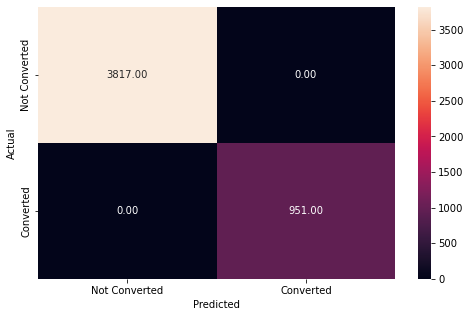

In [140]:
# Create the Decision Tree model
dtree = DecisionTreeClassifier(random_state=1)

# Train the Decision Tree model with the training set
dtree.fit(x_train, y_train)

# Check how model does on training data
y_pred_train2 = dtree.predict(x_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       954
           1       0.70      0.66      0.68       238

    accuracy                           0.88      1192
   macro avg       0.81      0.79      0.80      1192
weighted avg       0.87      0.88      0.87      1192



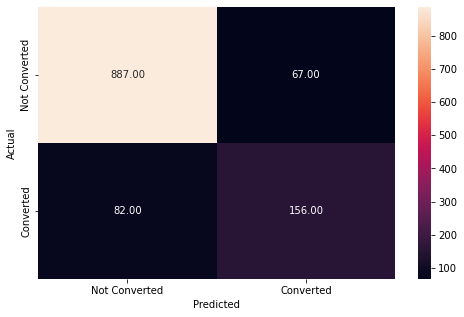

In [142]:

# Predict
y_pred_test2 = dtree.predict(x_test)

# Check performance
metrics_score(y_test, y_pred_test2)

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



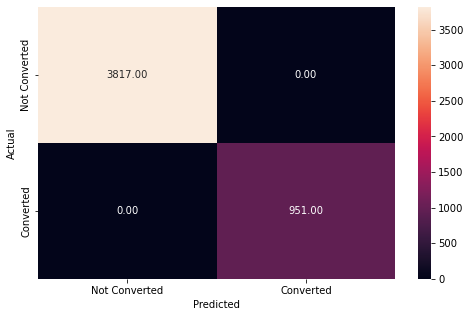

In [143]:
# Create the Random Forest Classifier model
rf = RandomForestClassifier(random_state=1)

# Train the Random Forest Classifier model with the training set
rf.fit(x_train, y_train)

# Check how model does on training data
y_pred_train3 = rf.predict(x_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       954
           1       0.87      0.66      0.75       238

    accuracy                           0.91      1192
   macro avg       0.90      0.82      0.85      1192
weighted avg       0.91      0.91      0.91      1192



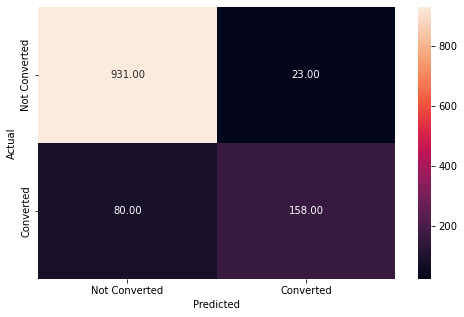

In [144]:

# Predict on testing data
y_pred_test3 = rf.predict(x_test)

# Check performance
metrics_score(y_test, y_pred_test3)

### **Random Forest Classifier Hyperparameter Tuning**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- The decision tree model and random forest model are both significantly overfitting. The logistic regression model has a recall of 0.5. Currently there is lots of room for improvement with hyperparameter tuning and maybe other models such as XGBoost and LightGBM

**2. Refined insights:** 
- The biggest insight we can derive is that the property value seems to have a big effect on whether a loan will end up paid or defaulting. 

**3. Proposal for the final solution design:** 
- Based on the information that I currently have present, I couldn't tell you exactly what model is best for this scenario. I need to conduct more testing and feature engineering for the purpose of maximizing the model's recall. 